In [ ]:
! pip install shap

In [2]:
import xgboost
import shap

從 SHAP 的內建數據集中加載成人數據集，建立並訓練 XGBoost 分類模型，初始化 SHAP 的解釋器，計算 SHAP 值

In [3]:
# train XGBoost model
X, y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)
# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 99%|===================| 32253/32561 [01:54<00:01]       

In [4]:
X # 32561 rows × 12 columns

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [5]:
y

array([False, False, False, ..., False, False,  True])

Target (category) :二元目標變量，指示個人收入是否超過 50K。

# A simple beeswarm summary plot
顯示資料集中的主要特徵如何影響模型輸出的資訊密集摘要。在下圖中，我們可以看到平均而言，年齡是最重要的特徵，而年輕人（藍色）的收入不太可能超過 5 萬美元。

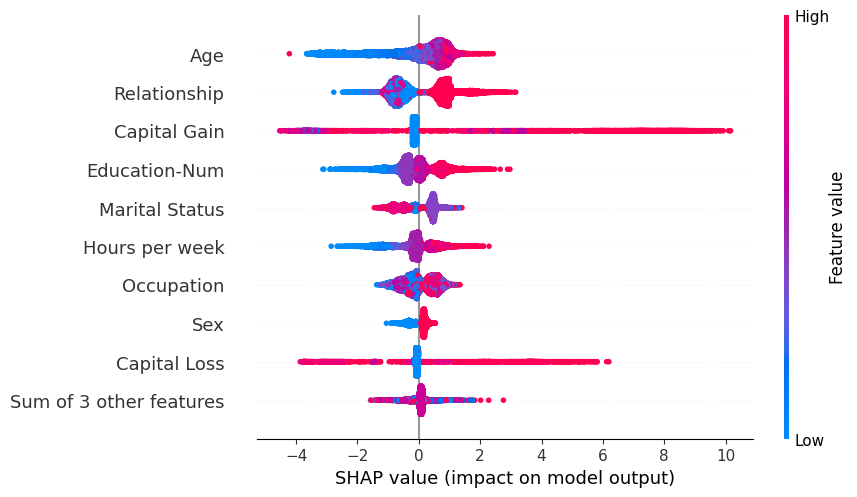

In [6]:
shap.plots.beeswarm(shap_values)

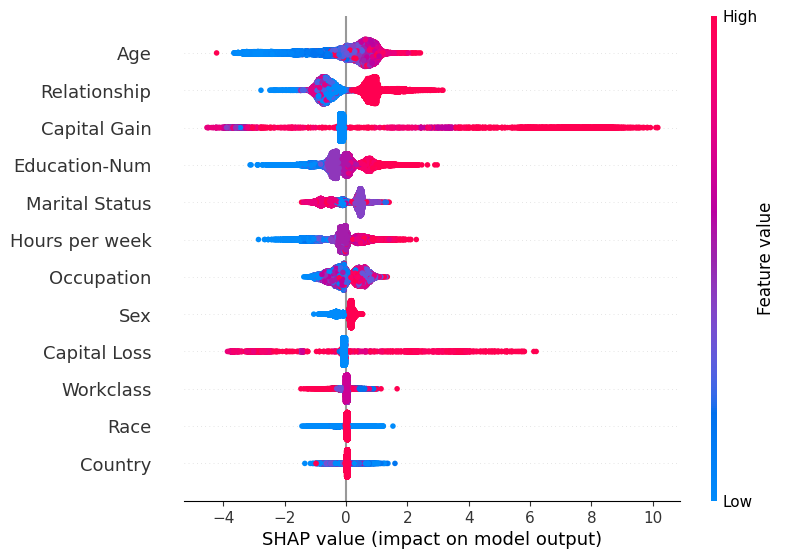

In [7]:
shap.plots.beeswarm(shap_values, max_display=20)

# Feature ordering
預設情況下，特徵使用 shap_values.abs.mean(0) 進行排序，它是每個特徵的 SHAP 值的平均絕對值。如果我們想找出對個人影響較大的特徵，我們可以依照最大絕對值排序

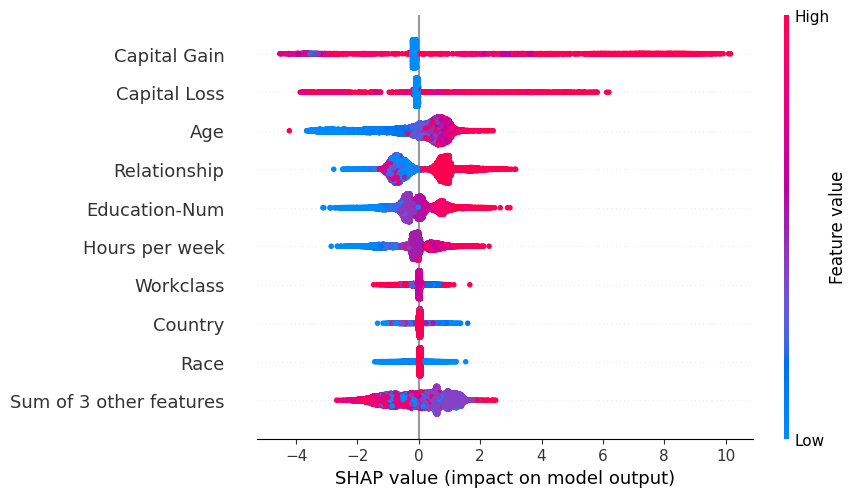

In [8]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

# Useful transforms
圖中顯示的每個 SHAP 值都將是正數，這樣可以突出特徵對預測結果影響的大小，而不再區分正向或負向影響。這意味著圖中關注的是每個特徵的重要性，而非它們具體增強或減少預測結果的方向。

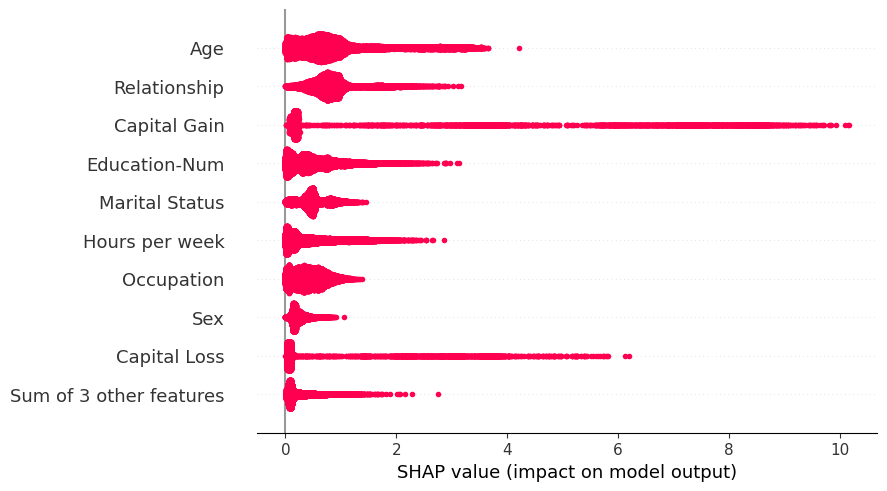

In [9]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

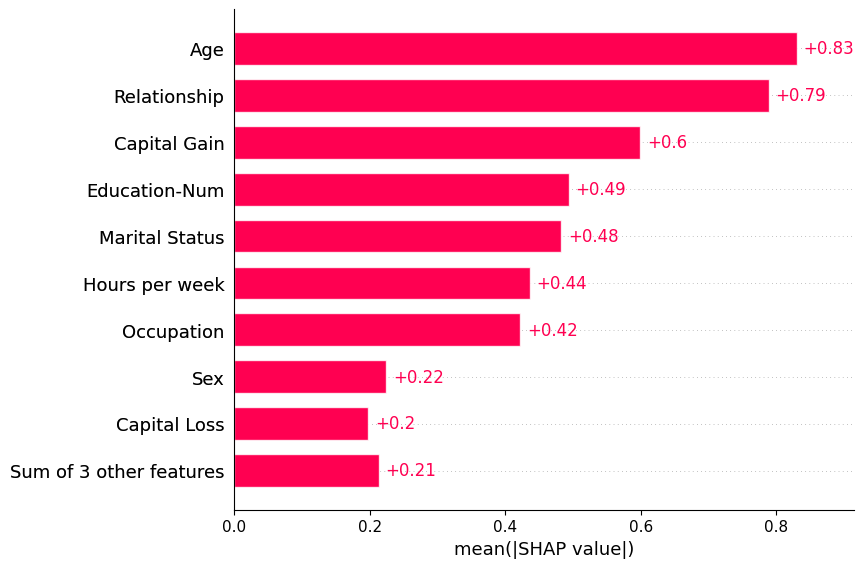

In [10]:
shap.plots.bar(shap_values.abs.mean(0))

# Custom colors
預設情況下，bee swarm 是使用red，我們則嘗試使用 color 參數傳遞任何 matplotlib 顏色或顏色圖

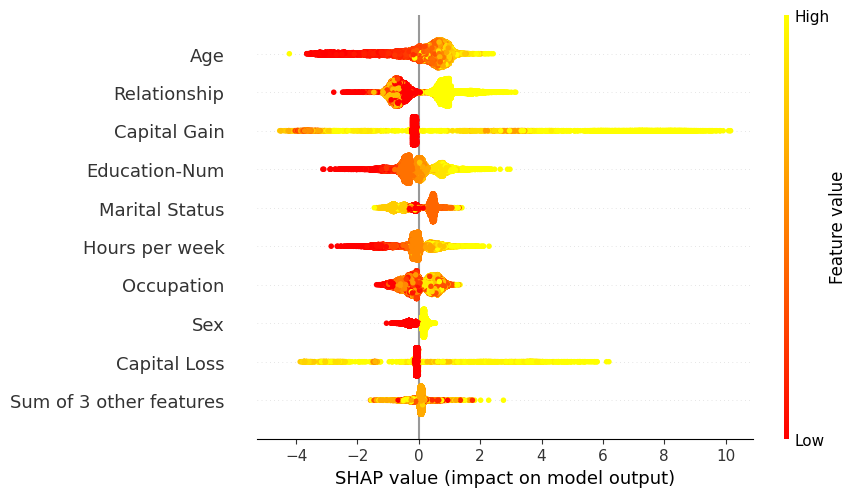

In [20]:
import matplotlib.pyplot as plt

shap.plots.beeswarm(shap_values, color=plt.get_cmap("autumn"))

https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html